# Mini Project (Classification model) on prediction of Bank Churn Customer

# Project Introduction
The goal of this project is to build a classification model that can predict whether a bank customer is likely to churn (leave the bank) based on various features such as credit score, geography, gender, age, tenure, balance, number of products, etc. The dataset used in this project contains information about these features along with the target variable 'Exited', which indicates whether the customer has churned or not.

In [1]:
#import required library
import numpy as np #for numerical calculation
import pandas as pd #for data analysis
import matplotlib.pyplot as plt #for visualization
import seaborn as sb #for visualization
import warnings #to ignore warning
warnings.filterwarnings('ignore')

# Data Importing and Exploration:

- The code begins by importing necessary libraries and loading the dataset using pd.read_csv().
- It explores the structure and summary statistics of the dataset using functions like df.shape, df.head(), df.info(), and df.describe().

In [2]:
# read data set
df = pd.read_csv('DS3_C6_S2_Classification_BankChurn_Data_Project.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Structure

In [3]:
df.shape # size of the data

(10000, 13)

In [4]:
df.sample(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8347,15757759,Okwuoma,807,Spain,Female,28,7,165969.26,3,1,0,156122.13,1
5532,15602572,Hsing,720,France,Male,33,9,0.00,2,1,1,142956.48,0
5419,15594456,K?,740,Spain,Female,56,4,99097.33,1,1,1,85016.64,1


In [5]:
df.columns # column names

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

## Data Summary

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.corr() # correlation

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


# Data Cleaning and Preprocessing:

- The code checks for missing values in the dataset using df.isnull().sum() and performs data cleaning if necessary. In this case, it seems that there are no missing values.

In [9]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Geography column contain same name with diffrent spelling so im replacing it

In [10]:
df['Geography']=df[['Geography']].replace('ger','Germany')
df['Geography']=df[['Geography']].replace('germany','Germany')
df['Geography']=df[['Geography']].replace('gernamy','Germany')
df['Geography']=df[['Geography']].replace('GERMANY','Germany')
df['Geography']=df[['Geography']].replace('spain','Spain')
df['Geography']=df[['Geography']].replace('fra','France')
df['Geography']=df[['Geography']].replace('france','France')

No null value can go for further analysis

# Exploratory Data Analysis (EDA):

- Univariate and bivariate analysis are performed to understand the distribution of categorical and numerical variables in the dataset.
- Visualization techniques such as count plots, histograms, box plots, and heatmaps are used to analyze the relationships between variables.

# Separating categorical and numerical variable

In [11]:
def seprate_data_type(df): # user define function for sperating categorical and numerical columns
    cat=[]                 # categorical 
    con=[]                 # numerical
    for column in df.columns:
        if df[column].nunique() < 40:
            cat.append(column)
        else:
            con.append(column)
    return cat,con

In [12]:
cat,con=seprate_data_type(df)

In [13]:
from tabulate import tabulate # importing table 


In [14]:
print(tabulate({'categorical':cat,'continuous':con}, headers=['categorical','numerical'])) # to view in table format

categorical     numerical
--------------  ---------------
Geography       CustomerId
Gender          Surname
Tenure          CreditScore
NumOfProducts   Age
HasCrCard       Balance
IsActiveMember  EstimatedSalary
Exited


# Univariant analysis

# Categorical

# Geography wise count plot

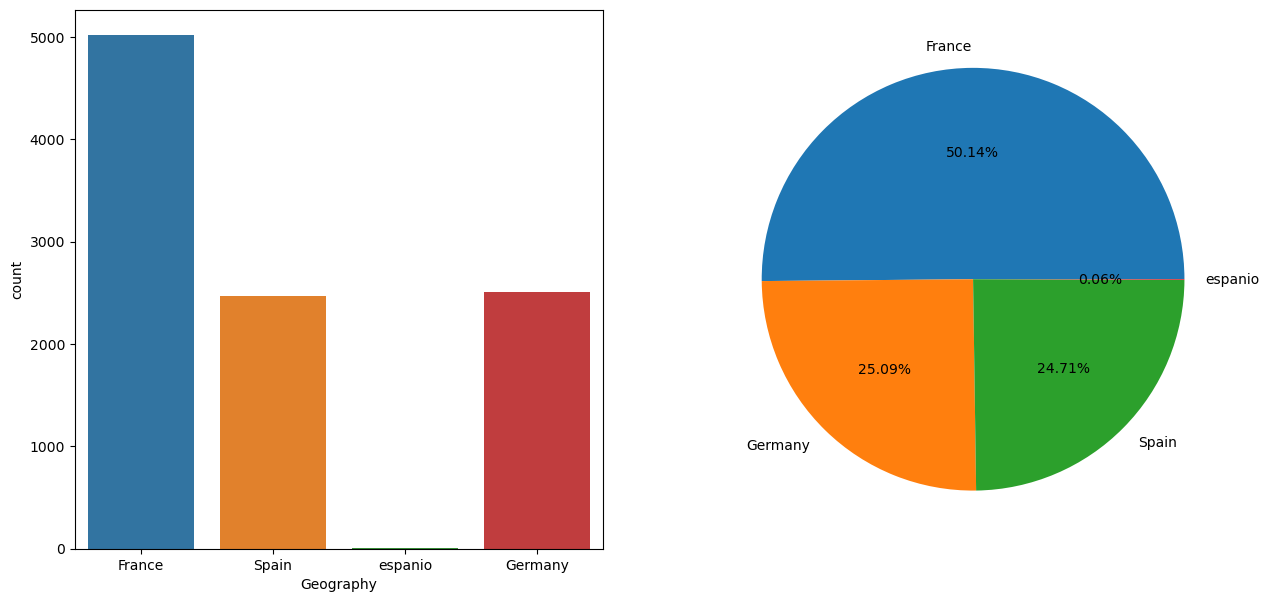

In [15]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
sb.countplot(x=df['Geography'],ax = ax[0])
plt.pie(df['Geography'].value_counts(),labels=list(df['Geography'].value_counts().index),autopct="%0.2f%%");

France has more count of about50%

# Gender wise count plot

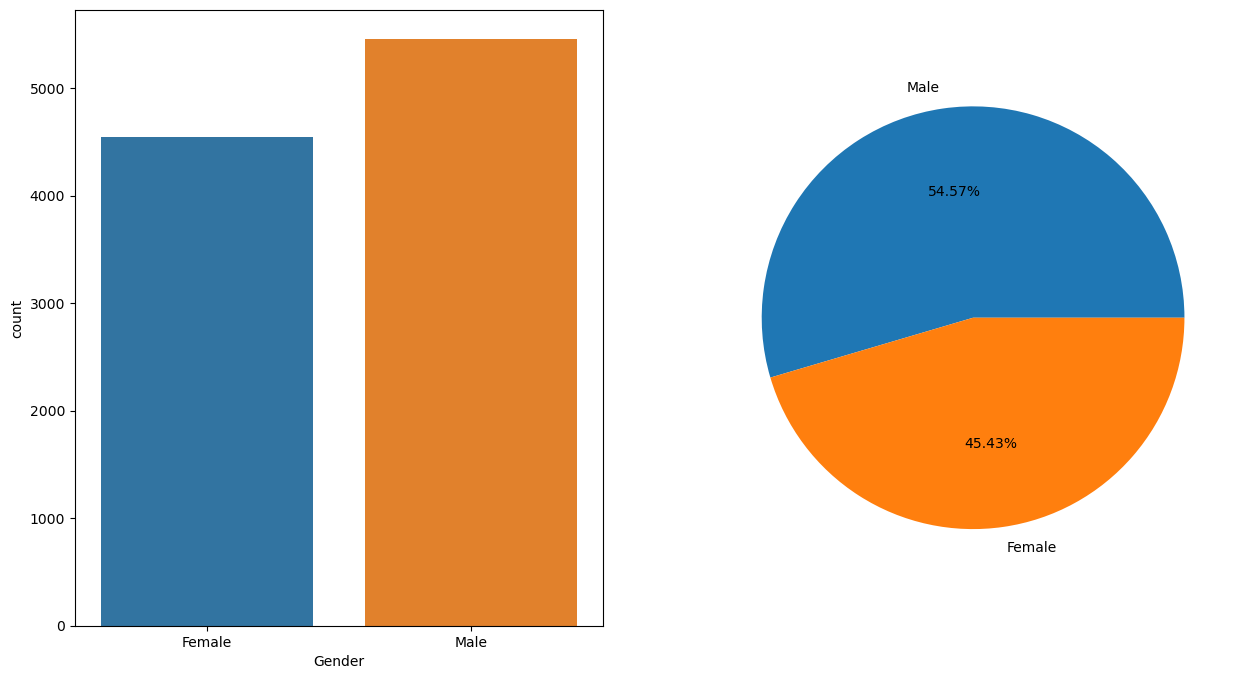

In [16]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
sb.countplot(x= df['Gender'],ax = ax[0])
sb.countplot(df['Gender'],ax=ax[0])
plt.pie(df['Gender'].value_counts(),labels=list(df['Gender'].value_counts().index),autopct="%0.2f%%");

Male has more count of about 54%

# Tenure

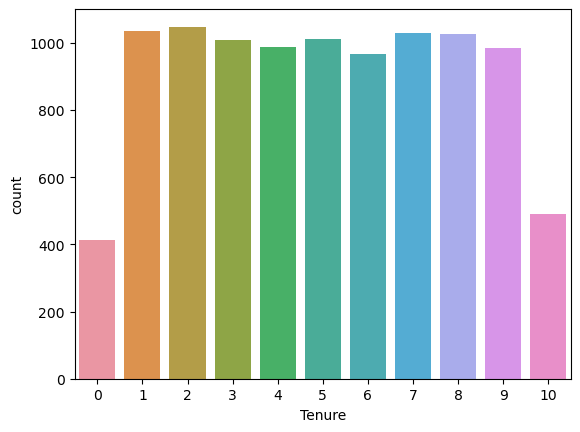

In [17]:
sb.countplot(df['Tenure']);

# NumOfProducts

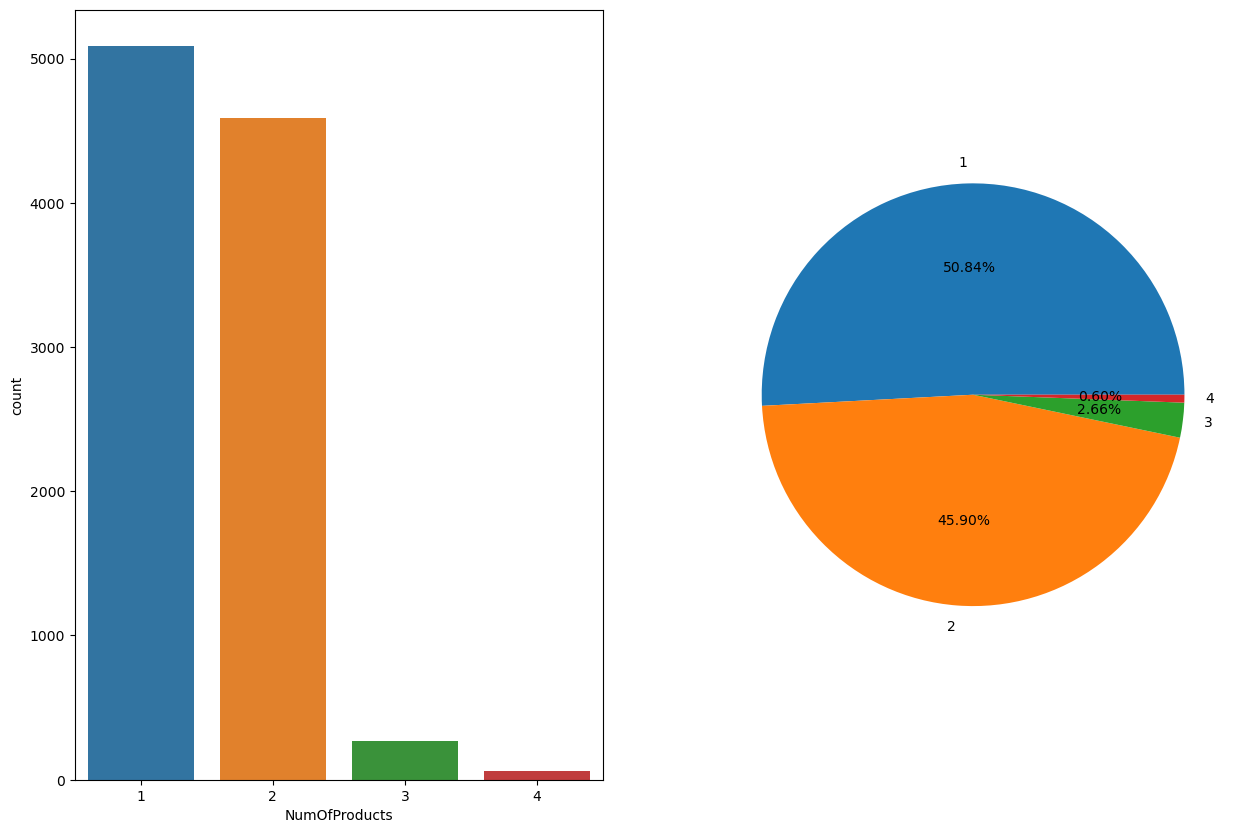

In [18]:
fig,ax= plt.subplots(1,2,figsize=(15,10))
sb.countplot(df['NumOfProducts'],ax=ax[0])
plt.pie(df['NumOfProducts'].value_counts(),labels=df['NumOfProducts'].value_counts().index,autopct='%0.2f%%');

# HasCrCard       

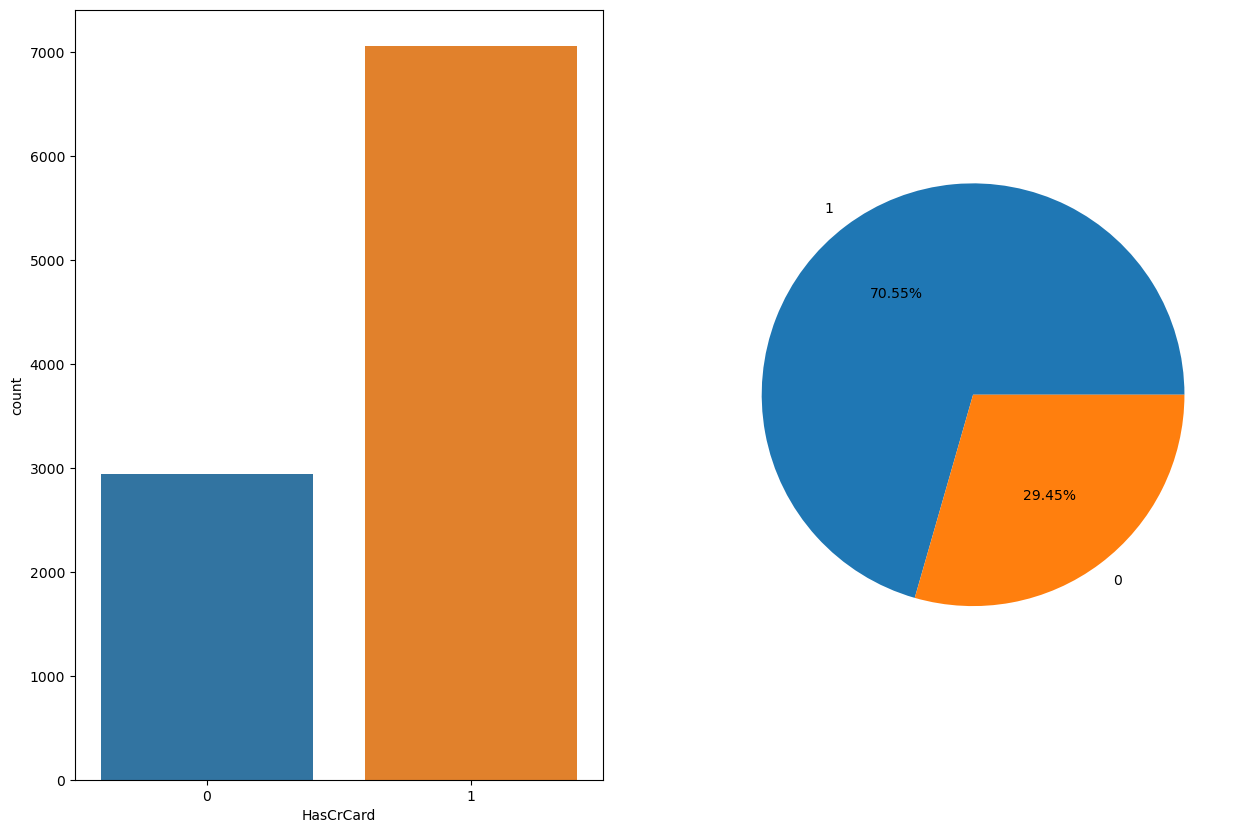

In [19]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
sb.countplot(df['HasCrCard'],ax=ax[0])
plt.pie(df['HasCrCard'].value_counts(),labels=list(df['HasCrCard'].value_counts().index),autopct='%0.2f%%');

# IsActiveMember  

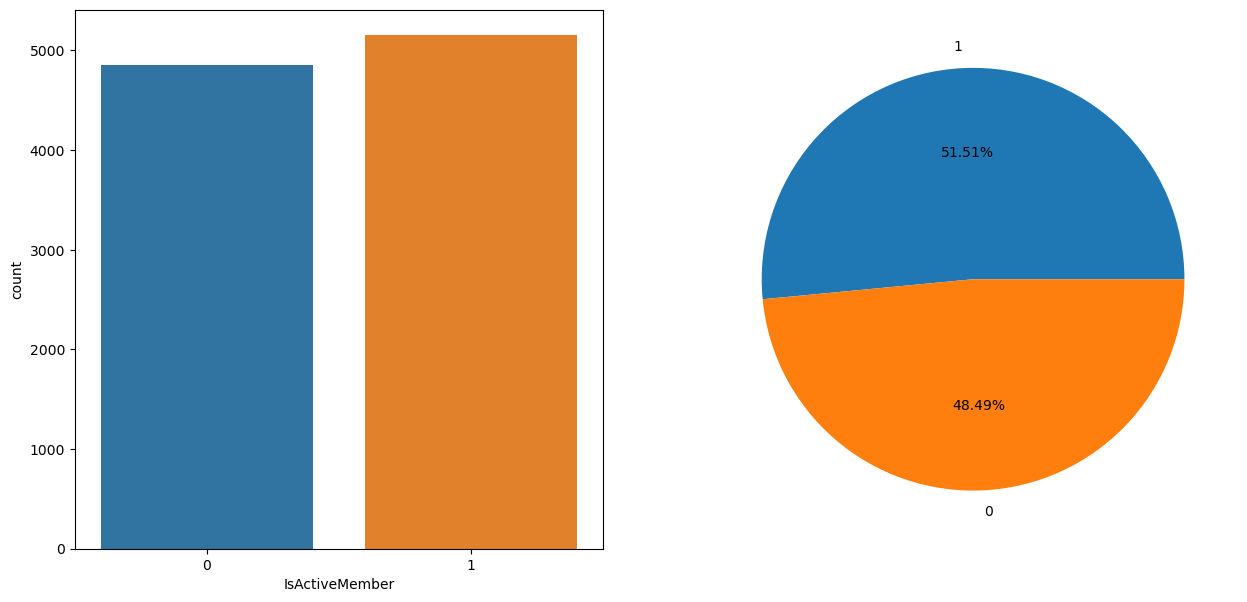

In [20]:
fig,ax= plt.subplots(1,2,figsize=(15,7))
sb.countplot(df['IsActiveMember'],ax=ax[0])
plt.pie(df['IsActiveMember'].value_counts(),labels=list(df['IsActiveMember'].value_counts().index),autopct='%0.2f%%');

# Exited

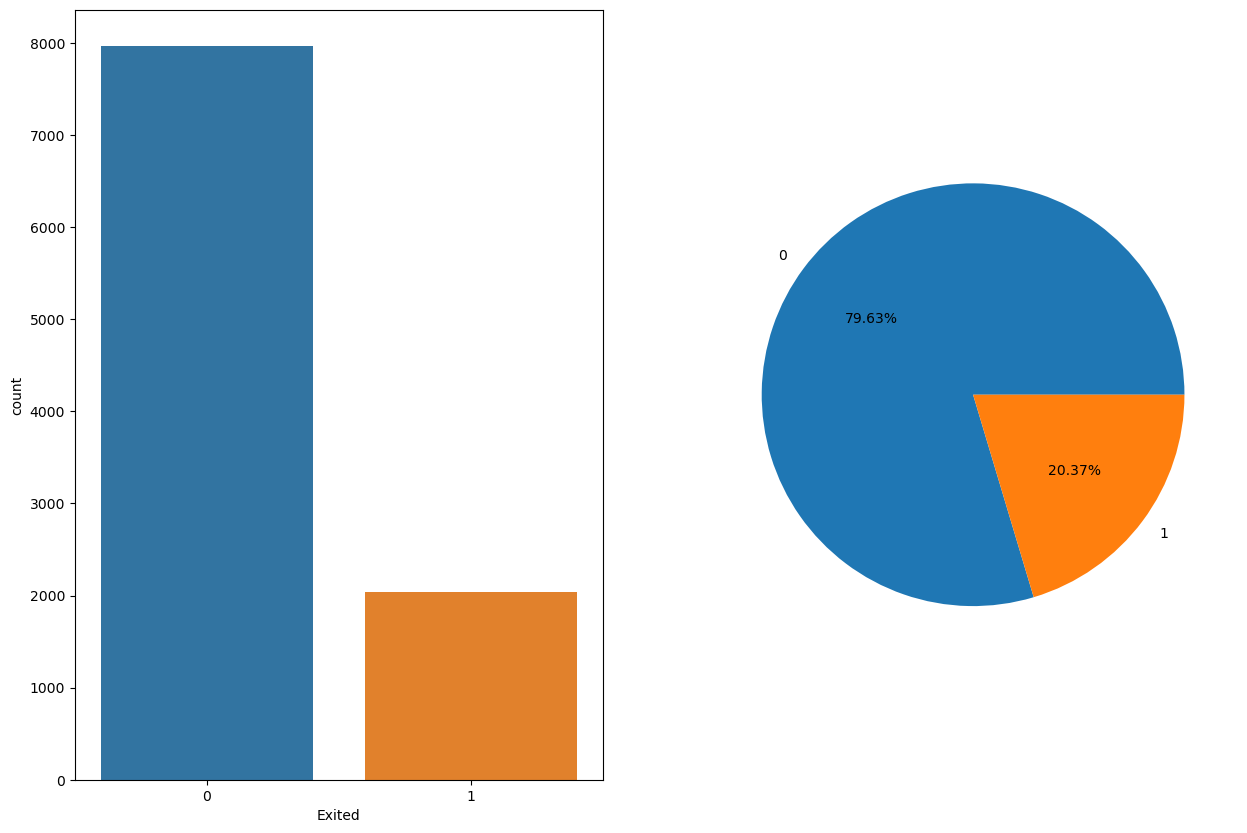

In [21]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
sb.countplot(df['Exited'],ax=ax[0])
plt.pie(df['Exited'].value_counts(),labels=list(df['Exited'].value_counts().index),autopct='%0.2f%%');

Only few are exited to leave the bank

# Numerical

In [22]:
def info_numerical(col):
    print("mean of the column is {}".format(df[col].mean()))
    print("meadian of the column is {}".format(df[col].median()))
    print("mode of the column is {}".format(df[col].mode()[0]))
    print("max of the column is {}".format(df[col].max()))
    print("Standard deviation of the column is {}".format(df[col].std()))

In [23]:
con #Customer id and name are not considered

['CustomerId', 'Surname', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [24]:
info_numerical('CreditScore')

mean of the column is 650.5288
meadian of the column is 652.0
mode of the column is 850
max of the column is 850
Standard deviation of the column is 96.65329873613061


<AxesSubplot:xlabel='CreditScore'>

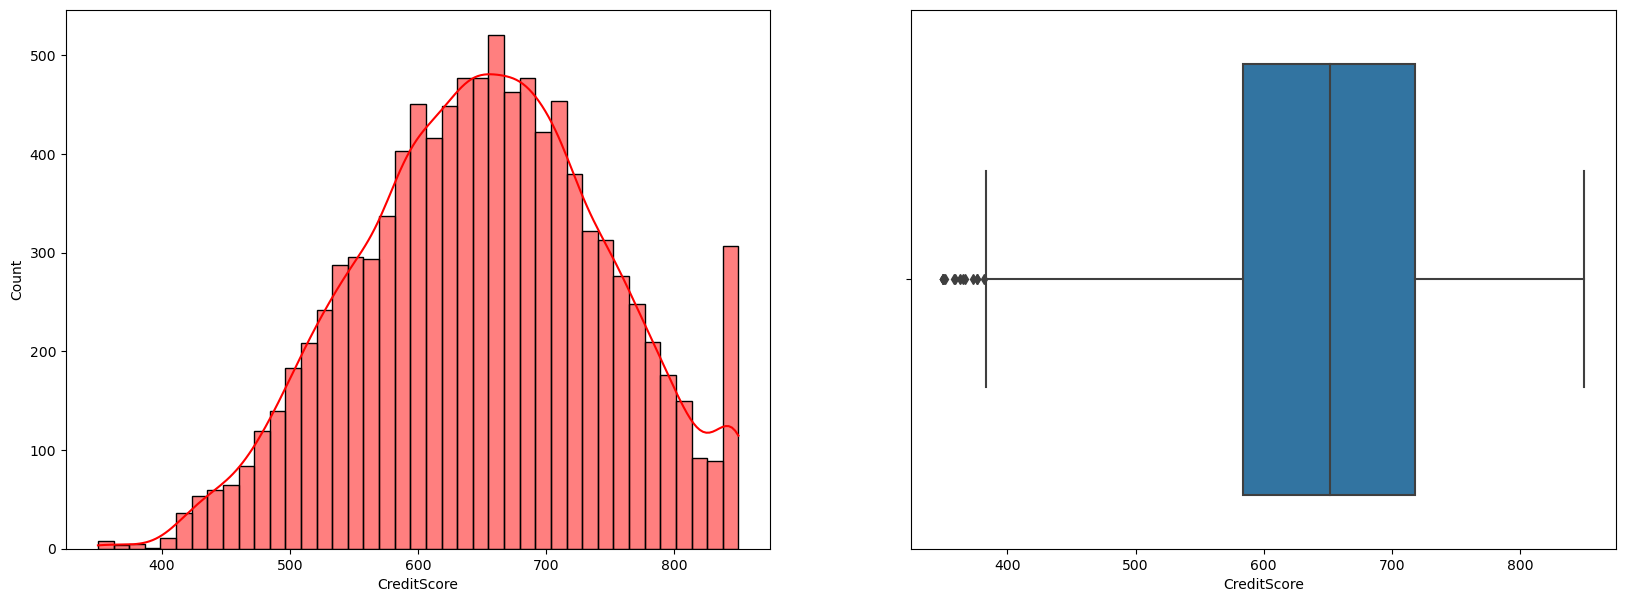

In [25]:
fig,ax = plt.subplots(1,2,figsize=(20,7))
sb.histplot(df['CreditScore'],ax=ax[0],color='r',kde=True)
sb.boxplot(df['CreditScore'],ax=ax[1])

In [26]:
info_numerical('Age')

mean of the column is 38.9218
meadian of the column is 37.0
mode of the column is 37
max of the column is 92
Standard deviation of the column is 10.487806451704591


<AxesSubplot:xlabel='Age'>

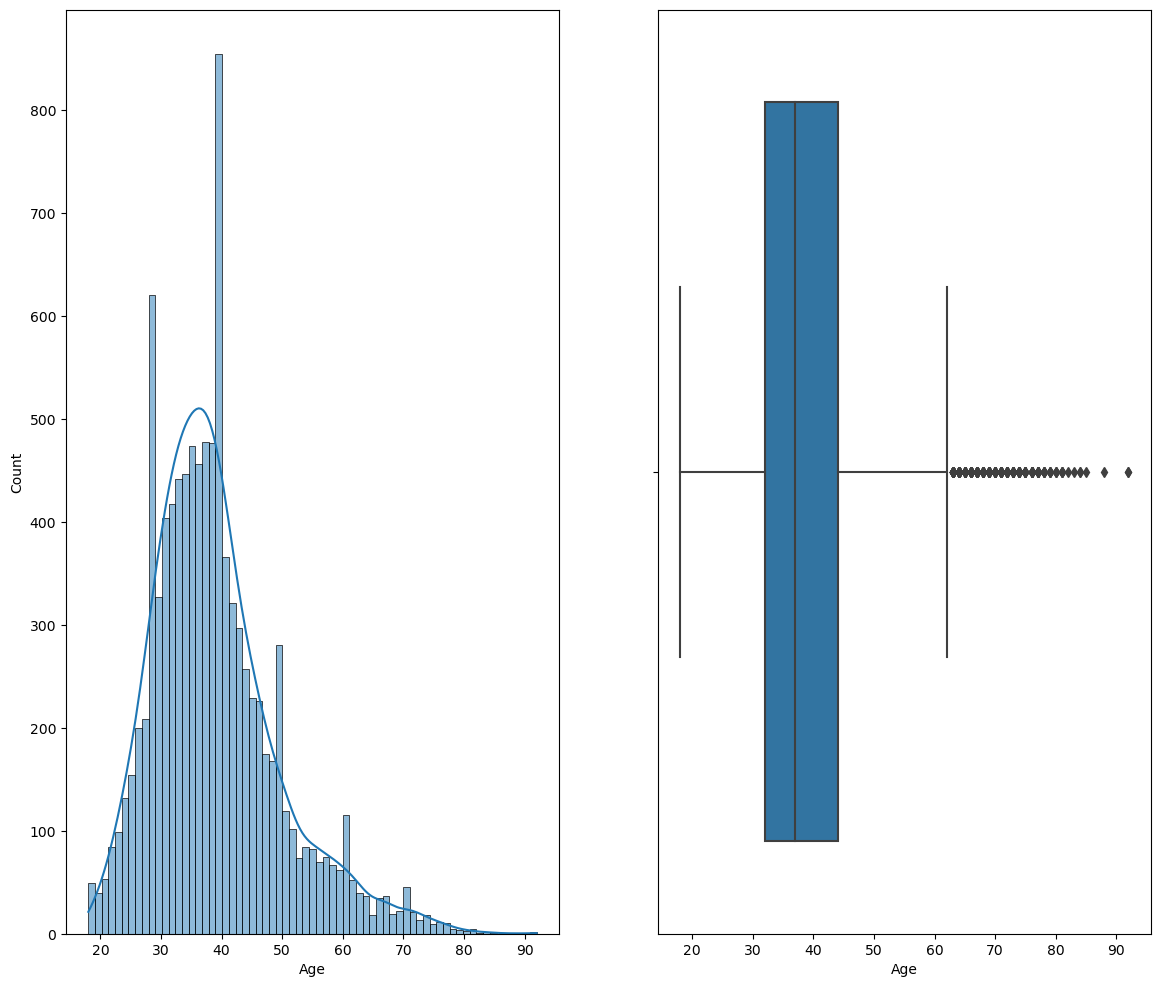

In [27]:
fig,ax = plt.subplots(1,2,figsize=(14,12))
sb.histplot(df['Age'],ax=ax[0],kde=True)
sb.boxplot(df['Age'],ax=ax[1])

In [28]:
info_numerical('Balance')

mean of the column is 76485.88928799961
meadian of the column is 97198.54000000001
mode of the column is 0.0
max of the column is 250898.09
Standard deviation of the column is 62397.40520238623


<AxesSubplot:xlabel='Balance'>

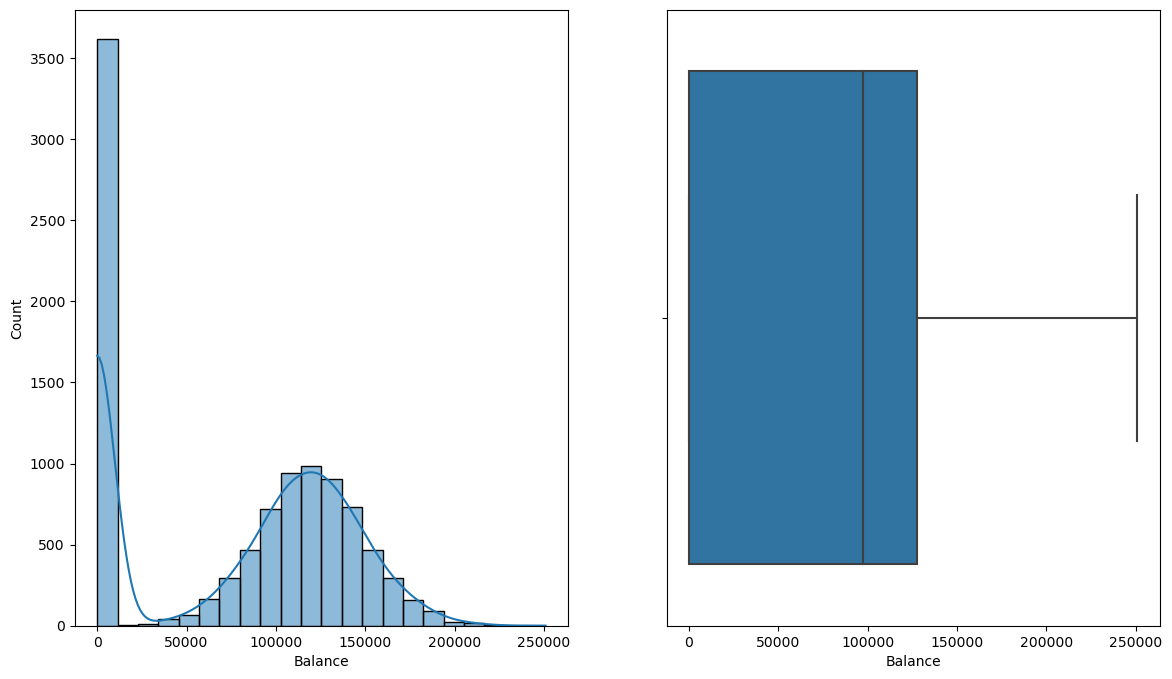

In [29]:
fig,ax= plt.subplots(1,2,figsize=(14,8))
sb.histplot(df['Balance'],ax=ax[0],kde=True)
sb.boxplot(df['Balance'],ax=ax[1])

In [30]:
info_numerical('EstimatedSalary')

mean of the column is 100090.2398809998
meadian of the column is 100193.915
mode of the column is 24924.92
max of the column is 199992.48
Standard deviation of the column is 57510.49281769822


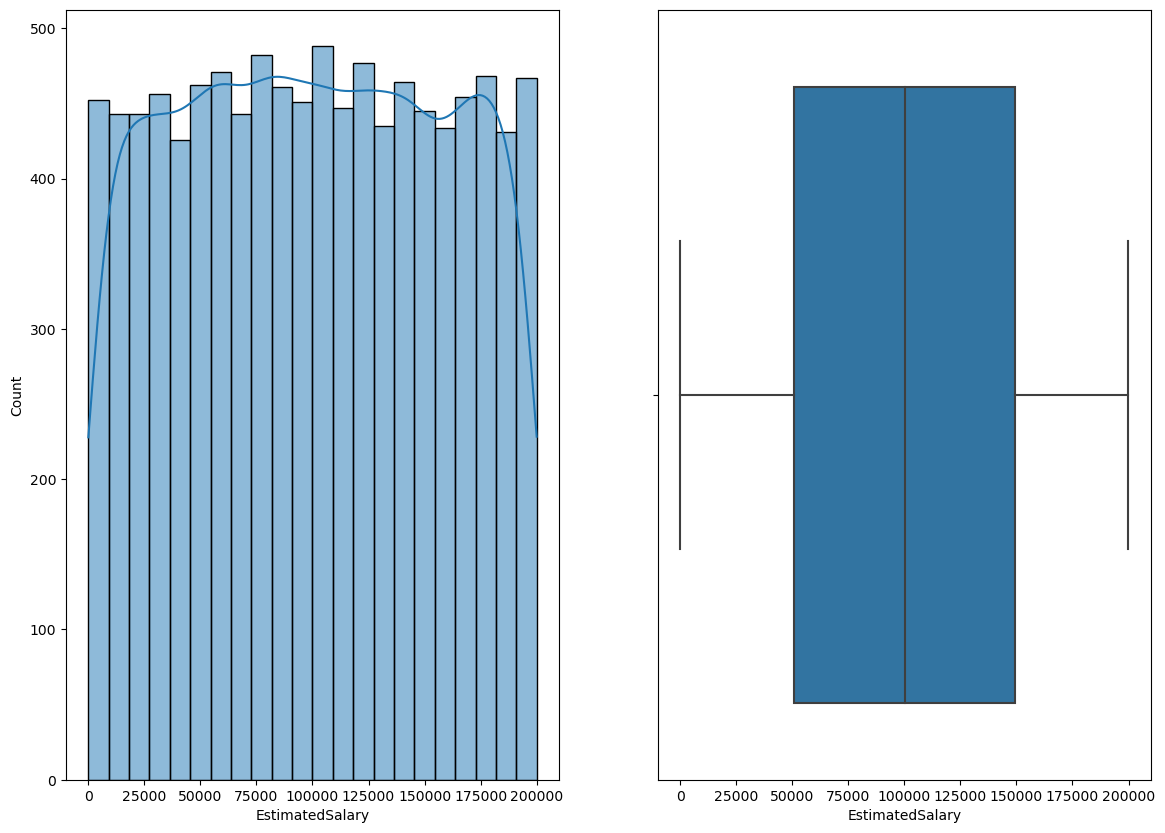

In [31]:
fig,ax= plt.subplots(1,2,figsize=(14,10))
sb.histplot(df['EstimatedSalary'],ax=ax[0],kde=True)
sb.boxplot(df['EstimatedSalary'],ax=ax[1]);

# Bi Variant

In [32]:
def percentage(ax,count):
    for bar in ax.patches:
        percentage=f"{round((bar.get_height() / len(df)*100),2)}%"
        
        x=bar.get_x() + bar.get_width() / 2
        y=bar.get_height()
        ax.annotate(percentage,(x,y),va='bottom',ha='center')
    plt.show()

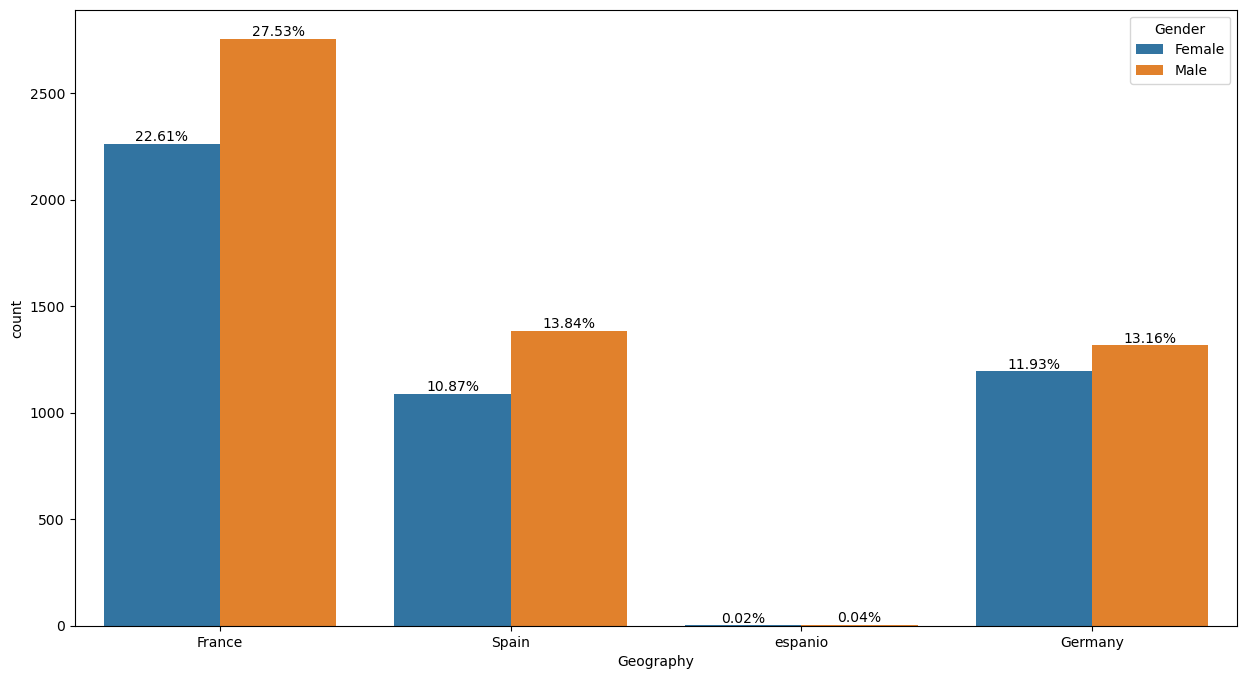

In [33]:
fig,ax = plt.subplots(figsize=(15,8))
sb.countplot(x=df['Geography'],hue=df['Gender'])

percentage(ax,len(df))

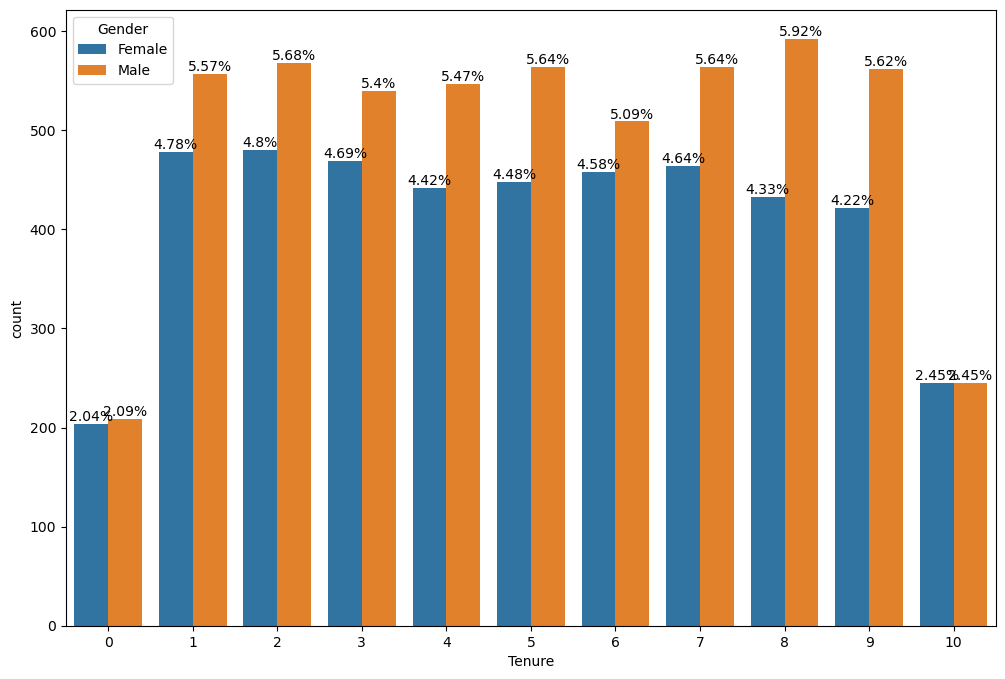

In [34]:
fig,ax= plt.subplots(figsize=(12,8))
sb.countplot(df['Tenure'],hue=df['Gender'])
percentage(ax,len(df));

In [35]:
cat

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

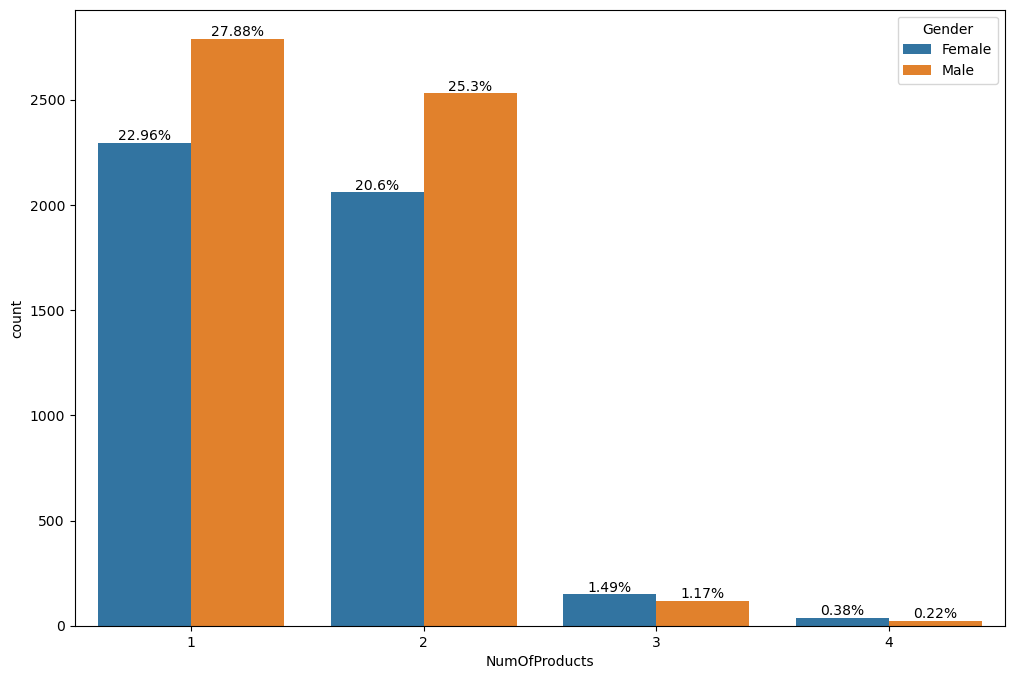

In [36]:
fig,ax = plt.subplots(figsize=(12,8))
sb.countplot(df['NumOfProducts'],hue=df['Gender'])
percentage(ax,len(df))

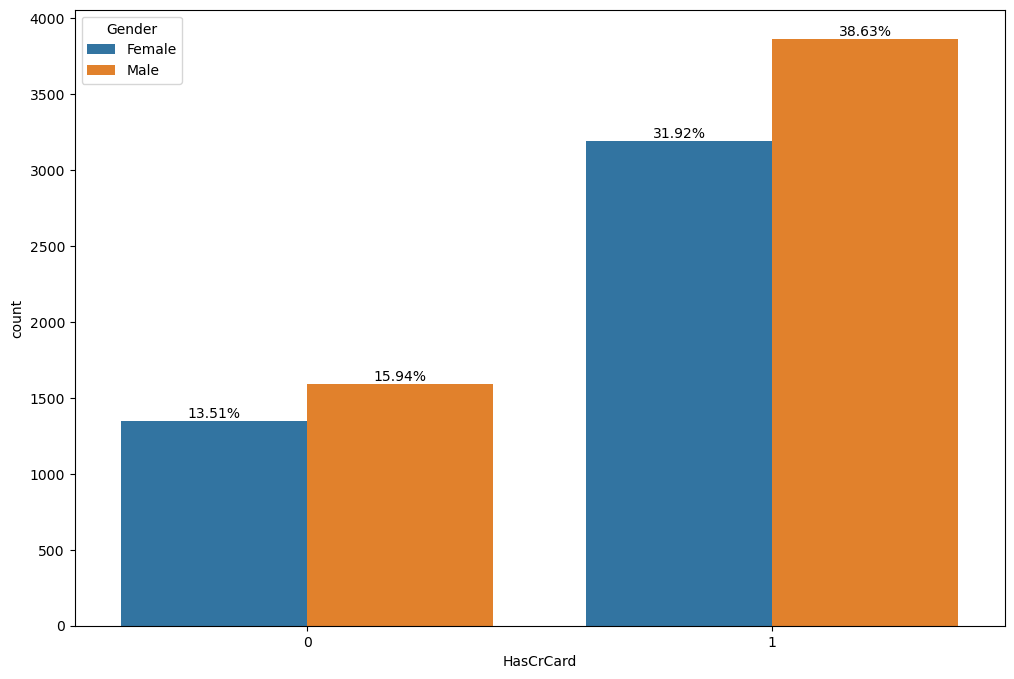

In [37]:
fig,ax = plt.subplots(figsize=(12,8))
sb.countplot(df['HasCrCard'],hue=df['Gender'])
percentage(ax,len(df))

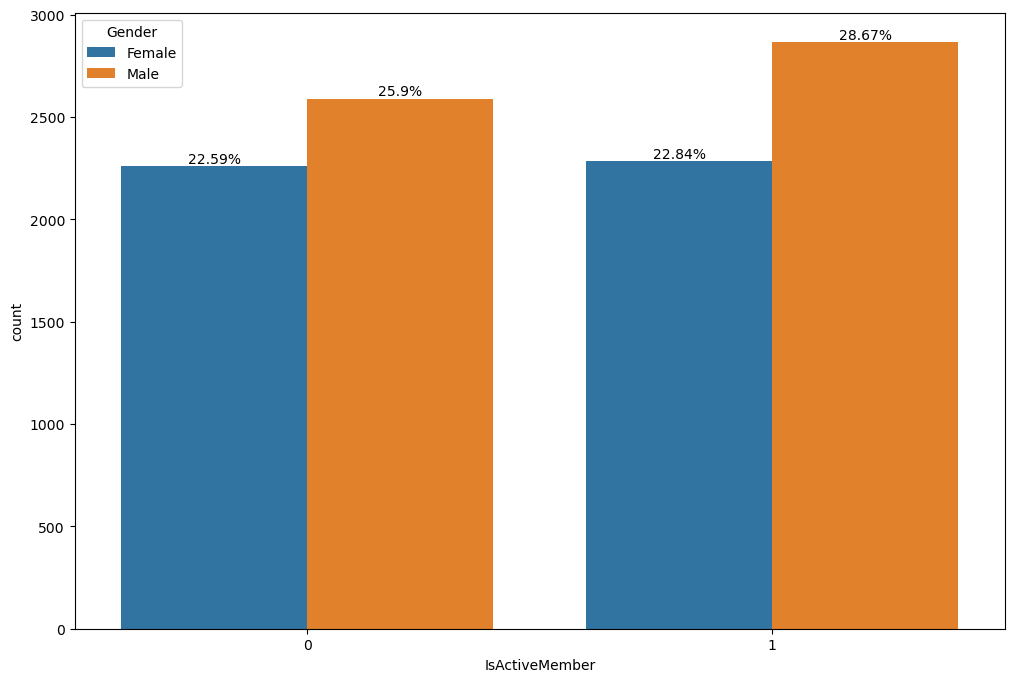

In [38]:
fig,ax = plt.subplots(figsize=(12,8))
sb.countplot(df['IsActiveMember'],hue=df['Gender'])
percentage(ax,len(df))

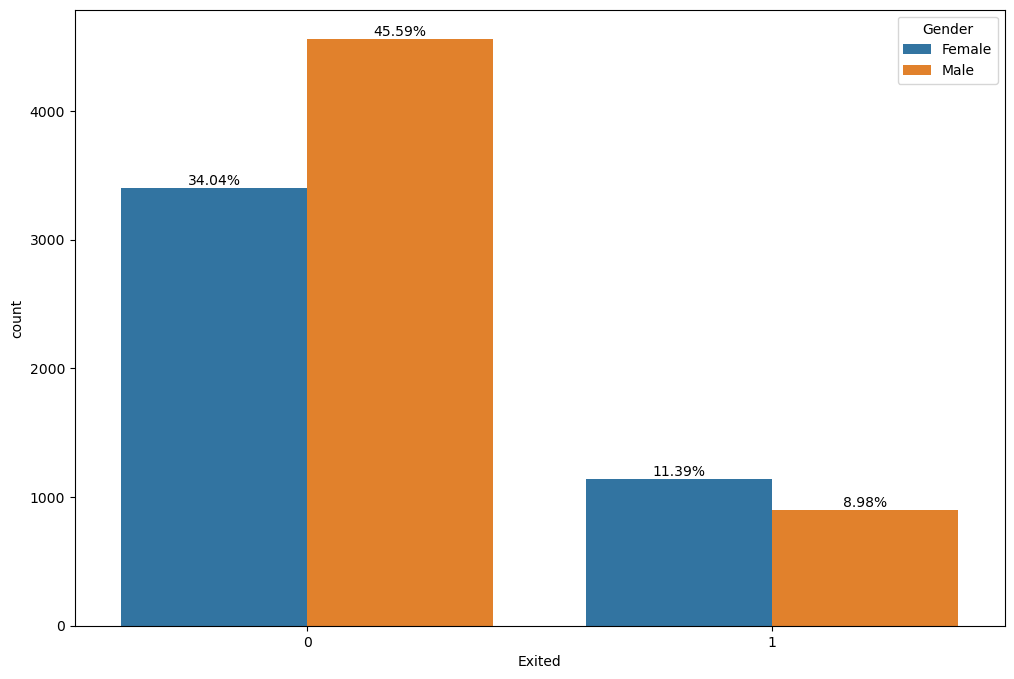

In [39]:
fig,ax = plt.subplots(figsize=(12,8))
sb.countplot(df['Exited'],hue=df['Gender'])
percentage(ax,len(df))

# continues bi varient analysis

In [40]:
con

['CustomerId', 'Surname', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

<AxesSubplot:xlabel='Gender', ylabel='CreditScore'>

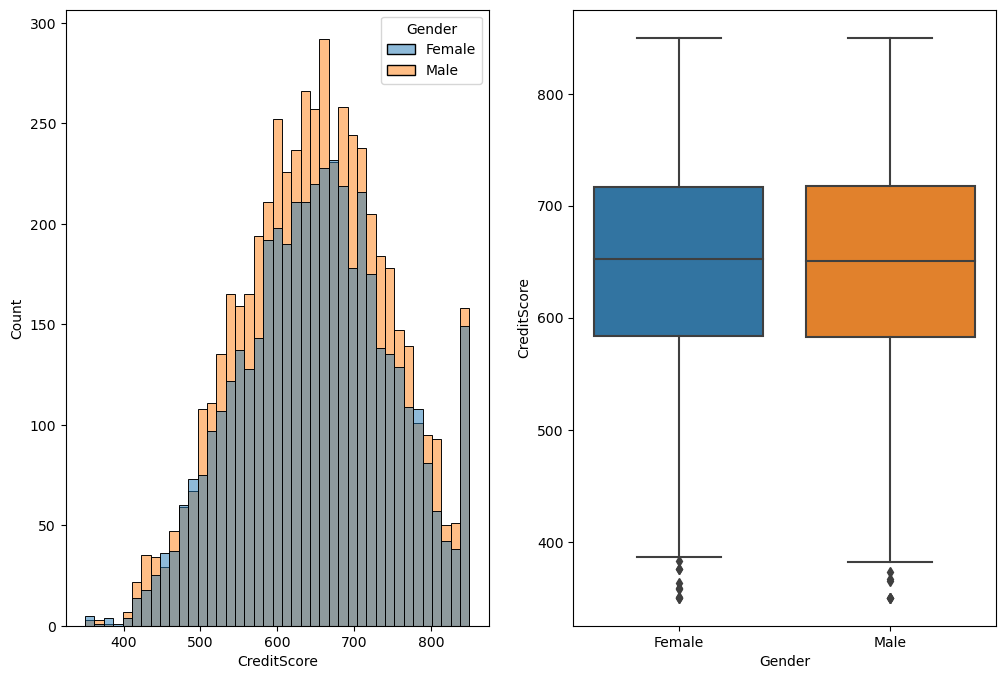

In [41]:
fig,ax = plt.subplots(1,2,figsize=(12,8))
sb.histplot(x=df['CreditScore'],hue=df['Gender'],ax=ax[0])
sb.boxplot(y=df['CreditScore'],x=df['Gender'],ax=ax[1])

<AxesSubplot:xlabel='Gender', ylabel='Age'>

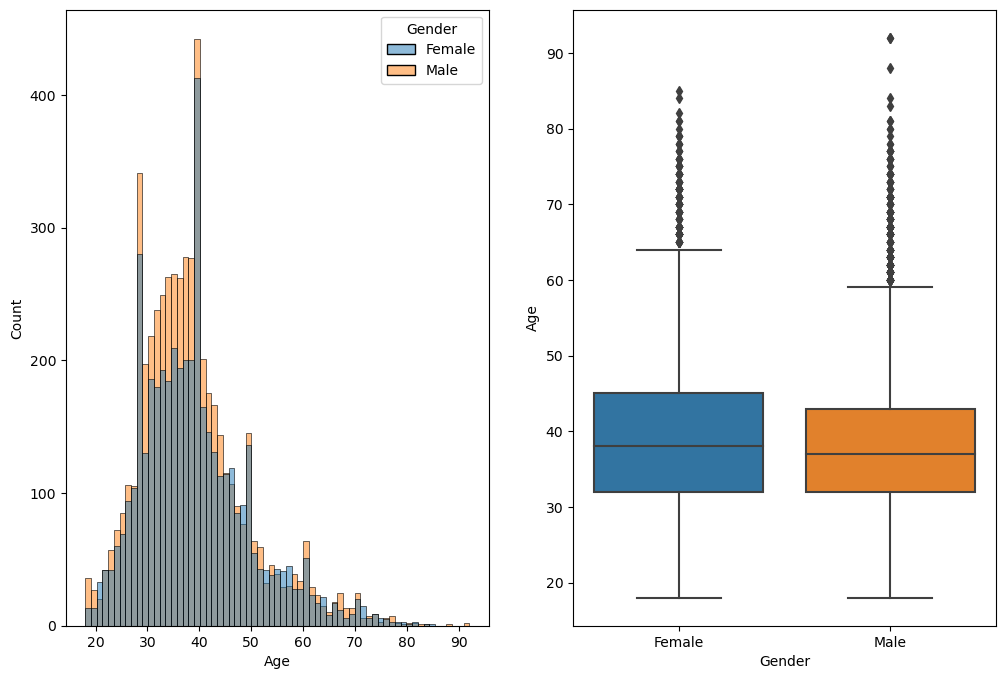

In [42]:
fig,ax= plt.subplots(1,2,figsize=(12,8))
sb.histplot(x=df['Age'],hue=df['Gender'],ax=ax[0])
sb.boxplot(y=df['Age'],x=df['Gender'],ax=ax[1])

<AxesSubplot:xlabel='Gender', ylabel='Balance'>

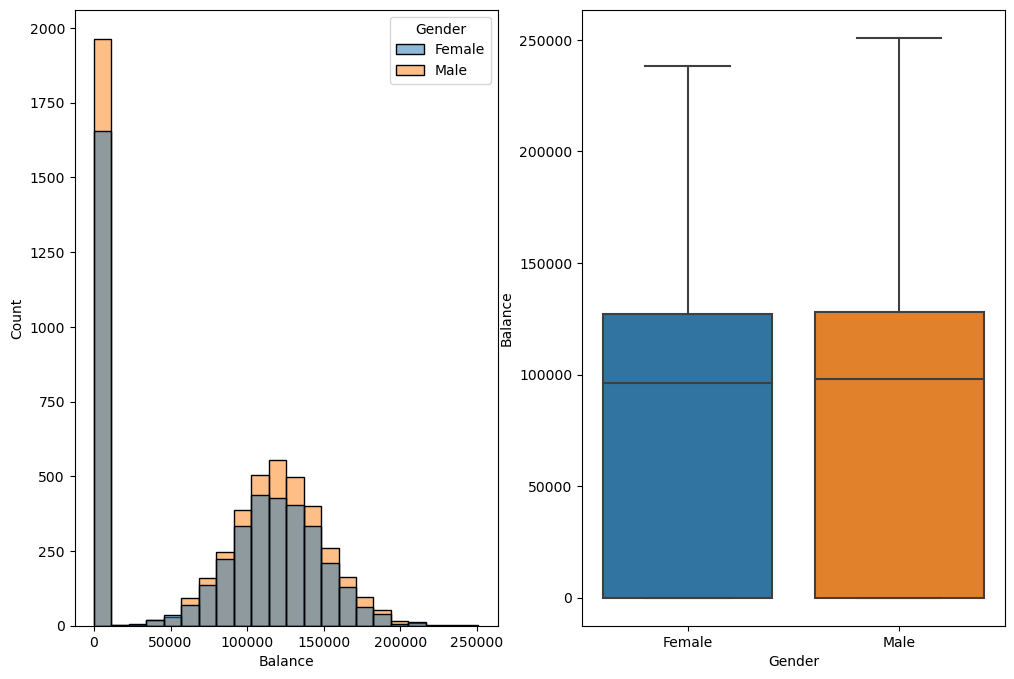

In [43]:
fig,ax= plt.subplots(1,2,figsize=(12,8))
sb.histplot(x=df['Balance'],hue=df['Gender'],ax=ax[0])
sb.boxplot(y=df['Balance'],x=df['Gender'],ax=ax[1])

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

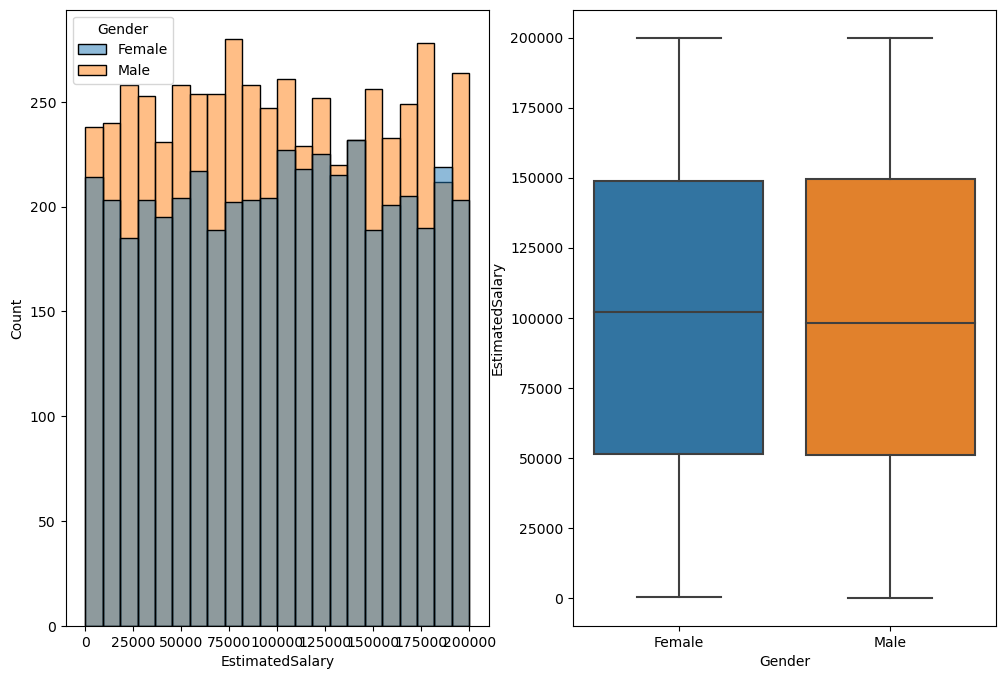

In [44]:
fig,ax = plt.subplots(1,2,figsize=(12,8))
sb.histplot(x=df['EstimatedSalary'],hue=df['Gender'],ax=ax[0])
sb.boxplot(y=df['EstimatedSalary'],x=df['Gender'],ax=ax[1])

# Multivariant analysis

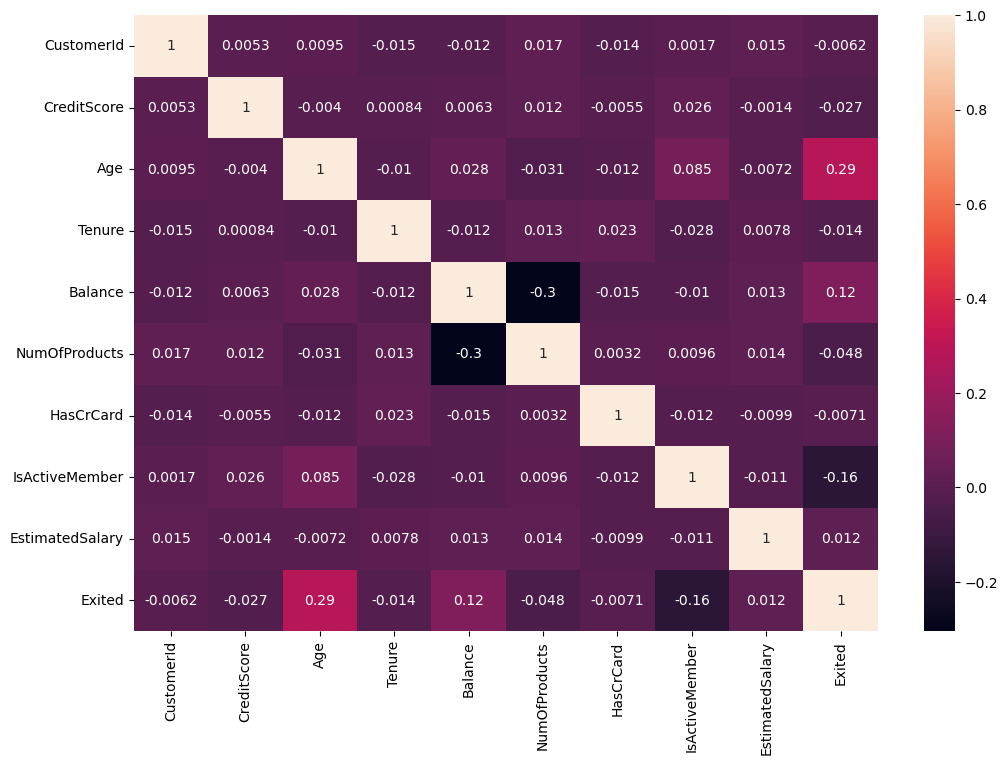

In [45]:
plt.figure(figsize=(12,8))
sb.heatmap(df.corr(),annot=True);

In [46]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
df2=df.drop(columns=['CustomerId','Surname'])
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Label Encoding and Preprocessing:

Categorical variables such as 'Geography' and 'Gender' are encoded into numerical format using LabelEncoder() to prepare the data for machine learning algorithms.

In [48]:
from sklearn.preprocessing import LabelEncoder # importing Label Endcoding

In [49]:
lbl=LabelEncoder() # labelencoder

In [50]:
df2['Geography'] = lbl.fit_transform(df2['Geography']) # converting Georaphy string to understand by machine learing
df2['Gender'] = lbl.fit_transform(df2['Gender'])       # converting Gender string to understand by machine learing

In [51]:
df2.info() # after label encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


# Splitting data into independent variable and target variable

In [52]:
x = df2.drop('Exited',axis=1) # independent variable
y= df2['Exited']              # target variable

# Feature Scaling:

Numerical features are scaled using techniques like Min-Max Scaling or Standard Scaling to bring them to a similar scale and improve model performance.

In [53]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler # import scaling library

In [54]:
mn= MinMaxScaler()
sc= StandardScaler()

In [55]:
a= mn.fit_transform(x) # scaling independent variable for further machine learning process

# Model Building and Selection:

- Several classification models including Logistic Regression, Decision Tree Classifier, Random Forest Classifier, SVM, KNN, AdaBoost Classifier, Naive Bayes, and a Stacking Classifier are imported.
- The code compares the performance of these models using cross-validation and selects the best-performing model based on accuracy scores.

## Train test Split

In [56]:
from sklearn.model_selection import train_test_split # importing train test split

In [57]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30) # splitting data into trian and test

# Importing models and cross validation

In [58]:
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold,cross_val_score # cross validation

In [59]:
# importing classification model 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

In [60]:
model_log= LogisticRegression()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()# by default n_estimater is 100
model_svc= SVC()
model_knn= KNeighborsClassifier()
model_ada= AdaBoostClassifier()
model_nb = GaussianNB()

In [61]:
def get_stacking(): # stacking model
    lbl = []
    lbl.append(('NB',GaussianNB()))
    lbl.append(('DT',DecisionTreeClassifier()))
    lbl.append(('RF',RandomForestClassifier()))
    lbl.append(('ADA',AdaBoostClassifier()))
    
    l1 = LogisticRegression()
    
    model = StackingClassifier(estimators=lbl,final_estimator=l1,cv=5)
    return model

In [62]:
modell=get_stacking()
modell

StackingClassifier(cv=5,
                   estimators=[('NB', GaussianNB()),
                               ('DT', DecisionTreeClassifier()),
                               ('RF', RandomForestClassifier()),
                               ('ADA', AdaBoostClassifier())],
                   final_estimator=LogisticRegression())

# Comparing multiple model for best prediction model

In [63]:
model = [model_log,model_dt,model_rf,model_svc,model_knn,model_ada,model_nb,modell] # to find best model with comparing other models
L,D,R,S,K,A,G,M=[],[],[],[],[],[],[],[]
splits = np.arange(2,11)
for i in splits:
    cv= KFold(n_splits=10,random_state=10,shuffle=True)
    for j in model:
        score = cross_val_score(j,x_train,y_train,cv=cv,n_jobs=-1)
        if j==model_log:
            L.append(score.mean())
        elif j==model_dt:
            D.append(score.mean())
        elif j==model_rf:
            R.append(score.mean())
        elif j==model_svc:
            S.append(score.mean())
        elif j==model_knn:
            K.append(score.mean())
        elif j==model_ada:
            A.append(score.mean())
        elif j==model_nb:
            G.append(score.mean())
        elif j==modell:
            M.append(score.mean())

In [64]:
pd.DataFrame({"N-Splits":splits,"Logical Regression":L,"Dession tree":D,"Random forest":R,"SVM":S,"KNN":K,"ADA boosting":A,"naive_bayes":G,"Metal Model-Stacking":M},index=list(range(len(splits))))


,N-Splits,Logical Regression,Dession tree,Random forest,SVM,KNN,ADA boosting,naive_bayes,Metal Model-Stacking
0,2,0.789857,0.786857,0.856286,0.793,0.764429,0.851286,0.782143,0.855000
1,3,0.789857,0.780714,0.857000,0.793,0.764429,0.851286,0.782143,0.857429
2,4,0.789857,0.785571,0.856571,0.793,0.764429,0.851286,0.782143,0.857143
3,5,0.789857,0.785143,0.859857,0.793,0.764429,0.851286,0.782143,0.855571
4,6,0.789857,0.783714,0.858429,0.793,0.764429,0.851286,0.782143,0.855714
5,7,0.789857,0.785714,0.859000,0.793,0.764429,0.851286,0.782143,0.856714
6,8,0.789857,0.786143,0.858143,0.793,0.764429,0.851286,0.782143,0.859286
7,9,0.789857,0.785429,0.857857,0.793,0.764429,0.851286,0.782143,0.856714
8,10,0.789857,0.784429,0.856857,0.793,0.764429,0.851286,0.782143,0.857571


Mata model has more accuracy than other model

In [65]:
modell.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('NB', GaussianNB()),
                               ('DT', DecisionTreeClassifier()),
                               ('RF', RandomForestClassifier()),
                               ('ADA', AdaBoostClassifier())],
                   final_estimator=LogisticRegression())

In [66]:
y_pred= modell.predict(x_test) # predincting test data
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
pd.DataFrame({'test data':y_test,'predicted data':y_pred}).sample(20) # to compare test data and predicted data

,test data,predicted data
6324,1,0
685,1,0
8273,0,1
7292,0,0
1482,0,0
9573,0,0
5746,0,0
3175,1,1
8178,0,0
9917,1,1


In [68]:
modell.score(x_test,y_test) # accuracy score

0.8643333333333333

## Model evaluation
- The selected model is trained on the training data and evaluated on the test data using metrics such as confusion matrix, recall, precision, F1-score, accuracy, ROC curve, and ROC AUC score.
- The model's performance is analyzed, and the classification report is generated to provide insights into its predictive capabilities.

In [69]:
from sklearn.metrics import confusion_matrix # confusion matrix
print(confusion_matrix(y_test,y_pred))

[[2315   97]
 [ 310  278]]


In [70]:
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score

In [71]:
print("recall score is {}".format(recall_score(y_test,y_pred)))
print("F1 score is {}".format(recall_score(y_test,y_pred)))
print("Precison score is {}".format(precision_score(y_test,y_pred)))
print("Accuracy score is {}".format(accuracy_score(y_test,y_pred)))

recall score is 0.47278911564625853
F1 score is 0.47278911564625853
Precison score is 0.7413333333333333
Accuracy score is 0.8643333333333333


# Classification Report 

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2412
           1       0.74      0.47      0.58       588

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



Roc and Auc score

In [73]:
modell.predict_proba(x_test)

array([[0.93290599, 0.06709401],
       [0.93203664, 0.06796336],
       [0.85546781, 0.14453219],
       ...,
       [0.90390092, 0.09609908],
       [0.88573404, 0.11426596],
       [0.79460399, 0.20539601]])

In [74]:
from sklearn.metrics import roc_auc_score # importing roc library
roc=roc_auc_score(y_test,modell.predict_proba(x_test)[:,1])
roc

0.8443680125449848

In [75]:
from sklearn.metrics import roc_curve # importing roc curve to view curve line

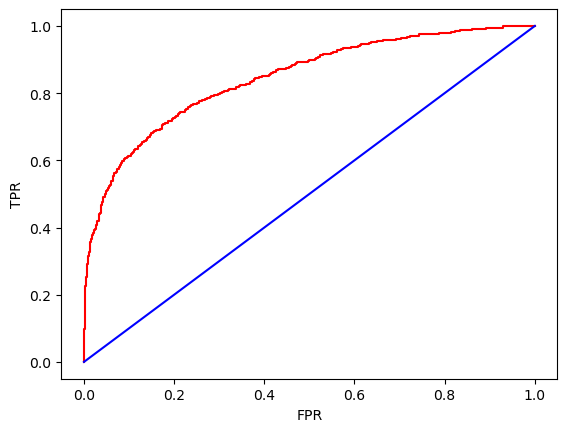

In [76]:
prob_value=modell.predict_proba(x_test)[:,1]
fpr,tpr,threshode = roc_curve(y_test,prob_value)
plt.plot(fpr,tpr,color='red',label='roc')
plt.plot([0,1],[0,1],color='blue',linestyle='-')
plt.xlabel('FPR')
plt.ylabel('TPR');

# Prediction and Exporting Model:

- The trained model is used to make predictions on new data instances.
- Finally, the model is exported in a pickle format for future use.

In [77]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [78]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [79]:
df2.Gender.unique()

array([0, 1])

In [80]:
Geography = {'France':0,'Spain':2,'espanio':3,'Germany':1}
Gender = {'Female':0, 'Male':1}

# Predicting with new input variable

In [81]:
modell.predict([[600,Geography['Germany'],Gender['Male'],30,1,3000,1,0,1,100000]])

array([0], dtype=int64)

In [82]:
modell.predict([[800,Geography['Spain'],Gender['Female'],26,3,40000,3,1,1,150000]])

array([0], dtype=int64)

In [83]:
modell.predict([[200,Geography['France'],Gender['Male'],24,4,1000,2,0,0,10000]])

array([0], dtype=int64)

# Exporting Model

In [84]:
import pickle

In [85]:
with open('Prediction of Bank Churn Customer (Classification problem)','wb') as f:
    pickle.dump(modell,f)

# Conclusion:
This code demonstrates the end-to-end process of building a classification model for predicting bank churn customers. It covers various aspects including data exploration, preprocessing, model selection, evaluation, and prediction. The model can be deployed for real-world applications to identify customers who are at risk of churning, allowing the bank to take proactive measures to retain them.